In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Results for 2x2 cubes

In [2]:
zg_result = "../csvs/t4-c2x2-mcts-c=100-steps=100k.csv"
paper_result = "../csvs/t7-best-paper-1.8184e-1.csv"

In [3]:
df = pd.concat({
    'zero_goal':   pd.read_csv(zg_result),
    'paper':   pd.read_csv(paper_result),
})
df.index.set_names(['method', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

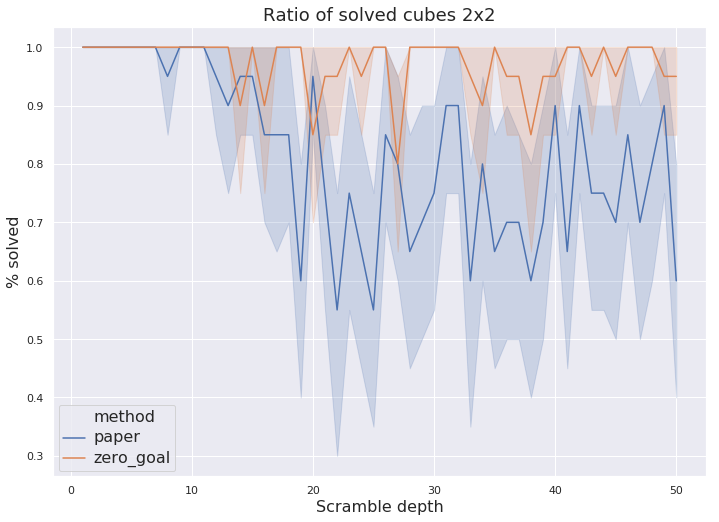

In [25]:
ax = sns.lineplot('depth', 'is_solved', data=df, hue='method');
ax.set_title("Ratio of solved cubes 2x2", fontsize=18)
ax.set_ylabel("% solved", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-solve_ratio.png");

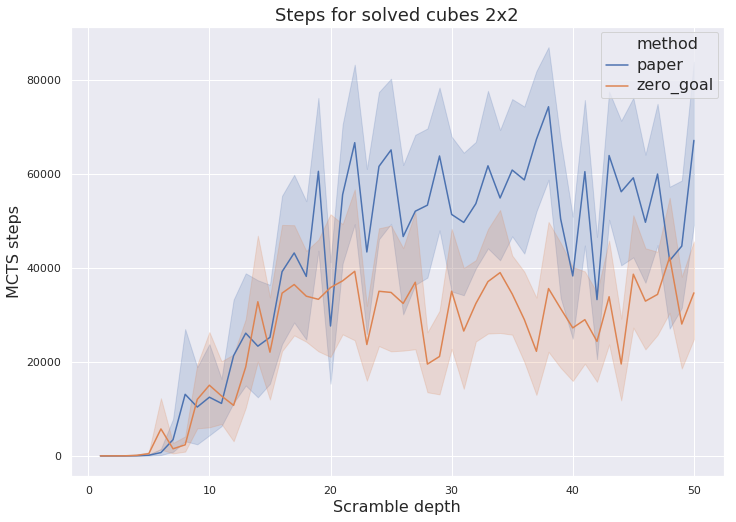

In [26]:
ax = sns.lineplot('depth', 'solve_steps', data=df, hue='method');
ax.set_title("Steps for solved cubes 2x2", fontsize=18)
ax.set_ylabel("MCTS steps", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-search_steps.png");

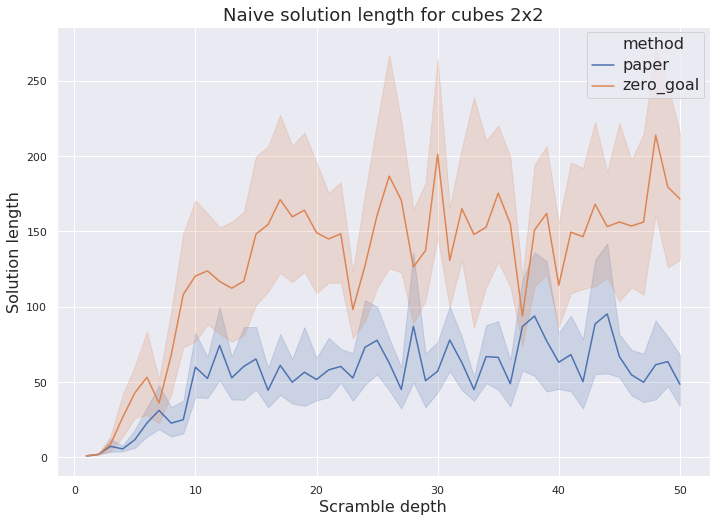

In [27]:
ax = sns.lineplot('depth', 'sol_len_naive', data=df[df.is_solved==1], hue='method');
ax.set_title("Naive solution length for cubes 2x2", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-naive_len.png");

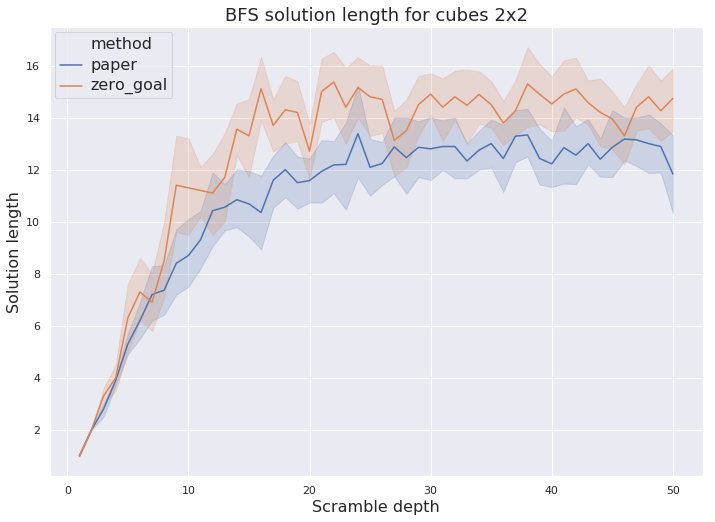

In [28]:
ax = sns.lineplot('depth', 'sol_len_bfs', data=df[df.is_solved==1], hue='method');
ax.set_title("BFS solution length for cubes 2x2", fontsize=18)
ax.set_ylabel("Solution length", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c2x2-bfs_len.png");

# Results for 3x3 cubes

In [4]:
!ls ../csvs/c3x3/

 c3-zg-d20.csv
 c3-zg-d20-noweight.csv
'c3-zg-d20-noweight-no-decay=5.501e-1.csv'
'c3-zg-d20-noweight-no-decay=5.61e-1.csv'
'c3-zg-d20-noweight-no-decay=6.43e-1.csv'
'c3-zg-d20-noweight-no-decay=7.29e-1.csv'
'c3-zg-d20-noweight-no-decay=chp100k.csv'
'c3-zg-d20-noweight-no-decay=chp64k.csv'


# Zero goal, weight vs no-weight

Result: weighted version is better

In [34]:
df = pd.concat({
    'weight':         pd.read_csv("../csvs/c3x3/c3-zg-d20.csv"),
    'no-weight':      pd.read_csv("../csvs/c3x3/c3-zg-d20-noweight.csv"),
})
df.index.set_names(['loss', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

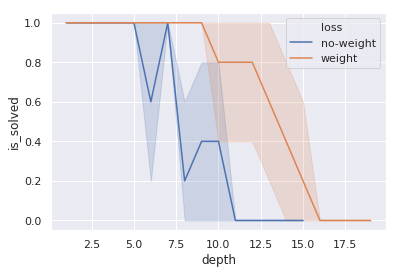

In [29]:
sns.lineplot('depth', 'is_solved', data=df, hue='loss');

In [32]:
df.columns

Index(['loss', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean', 'speed'],
      dtype='object')

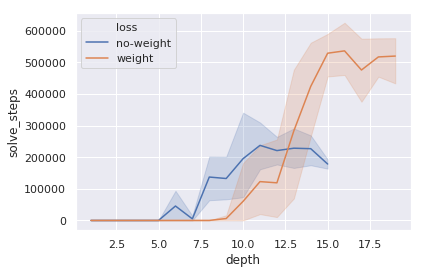

In [35]:
sns.lineplot('depth', 'solve_steps', data=df, hue='loss')

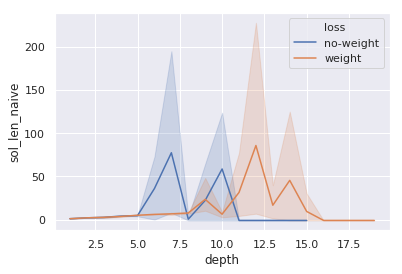

In [37]:
sns.lineplot('depth', 'sol_len_naive', data=df, hue='loss');

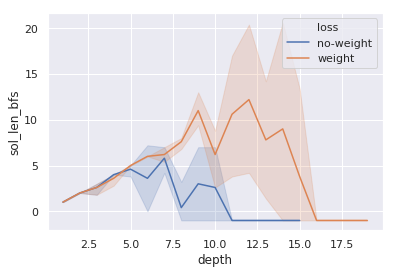

In [36]:
sns.lineplot('depth', 'sol_len_bfs', data=df, hue='loss');

# Zero goal, different losses

In [30]:
df = pd.concat({
    'loss=5.50e-1':   pd.read_csv("../csvs/c3x3/c3-zg-d20-noweight-no-decay=5.501e-1.csv"),
    'loss=5.61e-1':   pd.read_csv("../csvs/c3x3/c3-zg-d20-noweight-no-decay=5.61e-1.csv"),
    'loss=6.43e-1':   pd.read_csv("../csvs/c3x3/c3-zg-d20-noweight-no-decay=6.43e-1.csv"),
    'loss=7.29e-1':   pd.read_csv("../csvs/c3x3/c3-zg-d20-noweight-no-decay=7.29e-1.csv"),    
})
df.index.set_names(['loss', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

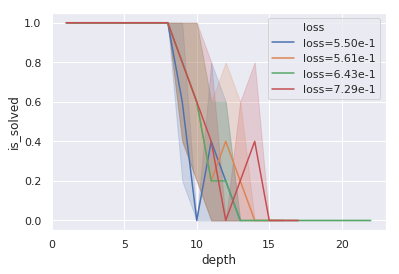

In [31]:
sns.lineplot('depth', 'is_solved', data=df, hue='loss');

# Paper vs zero-goal

In [42]:
df.columns

Index(['method', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean', 'speed'],
      dtype='object')

In [39]:
df = pd.concat({
    'zero-goal':         pd.read_csv("../csvs/c3x3/c3-zg-d20.csv"),
    'paper':             pd.read_csv("../csvs/c3x3/c3-paper-d20-1.93e-1.csv"),
})
df.index.set_names(['method', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

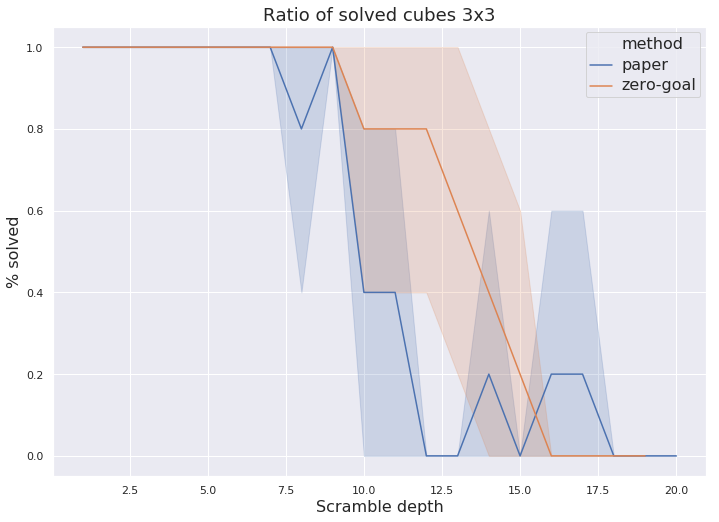

In [49]:
ax = sns.lineplot('depth', 'is_solved', data=df[df.depth <= 20], hue='method');
ax.set_title("Ratio of solved cubes 3x3", fontsize=18)
ax.set_ylabel("% solved", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-solve_ratio.png");

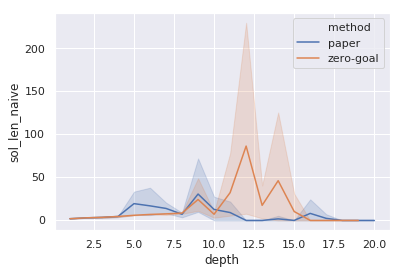

In [45]:
sns.lineplot('depth', 'sol_len_naive', data=df[df.depth <= 20], hue='method');

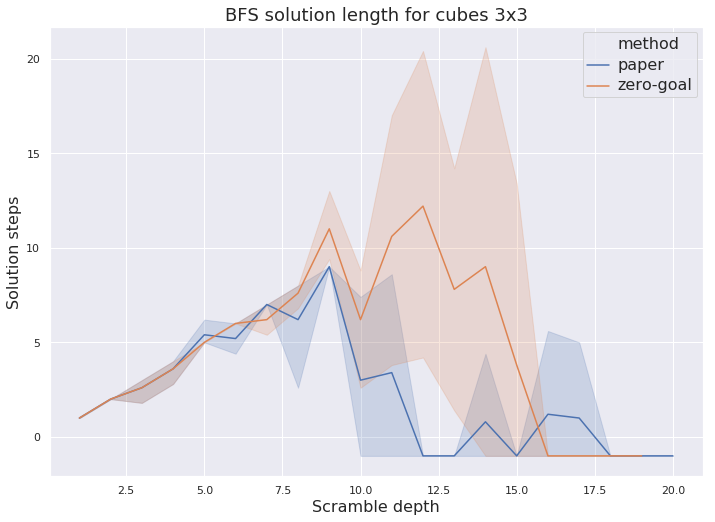

In [51]:
ax = sns.lineplot('depth', 'sol_len_bfs', data=df[df.depth <= 20], hue='method');
ax.set_title("BFS solution length for cubes 3x3", fontsize=18)
ax.set_ylabel("Solution steps", fontsize=16);
ax.set_xlabel("Scramble depth", fontsize=16);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='16');
plt.savefig("../c3x3-bfs_length.png");